In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
URL = pd.read_csv("URL dataset.csv", encoding='ISO-8859-1')
URL.head(10)

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate
5,https://www.reddit.com,legitimate
6,https://www.yahoo.com,legitimate
7,https://www.google.co.in,legitimate
8,https://www.qq.com,legitimate
9,https://www.amazon.com,legitimate



## url_length: URL 길이
## num_dots: "."
## num_hyphens : "-"
## has_https: "https" 포함 여부
## has_suspicious_word(이 단어가 있으면 안좋음):
["login', 'secure', 'account', 'update', 'free', 'bonus', 'verify', 'signin', 'bank', 'confirm'" ]

In [ ]:
df = pd.read_csv("URL_dataset_processed(new).csv", encoding='ISO-8859-1')
df.head(10)

,url,type,url_length,num_dots,num_hyphens,has_https,has_suspicious_word
0,http://www.carofoto. ch/img/,phishing,28,2,0,False,0
1,http://oyd2s.fubyxoresabpps.info/ji28iz584d?th...,phishing,120,5,0,False,0
2,https://www.linkedin.com/in/larsfrancke,legitimate,39,2,0,True,0
3,https://www.kansascity.com/2011/03/24/2751174/...,legitimate,80,3,5,True,0
4,https://www.en.wikipedia.org/wiki/Dem_Bones,legitimate,43,3,0,True,0
5,https://www.heather-yampolsky.suite101.com/la-...,legitimate,106,3,11,True,0
6,http://onlyfung.isp12.admintest.ru/panel/,phishing,41,3,0,False,0
7,http://gilles.chevalier.free.fr/6/6.exe,phishing,39,4,0,False,1
8,https://www.enotes.com/topic/UCLA_Bruins_men%2...,legitimate,59,2,0,True,0
9,https://www.myworkday.com,legitimate,25,2,0,True,0


# url_length

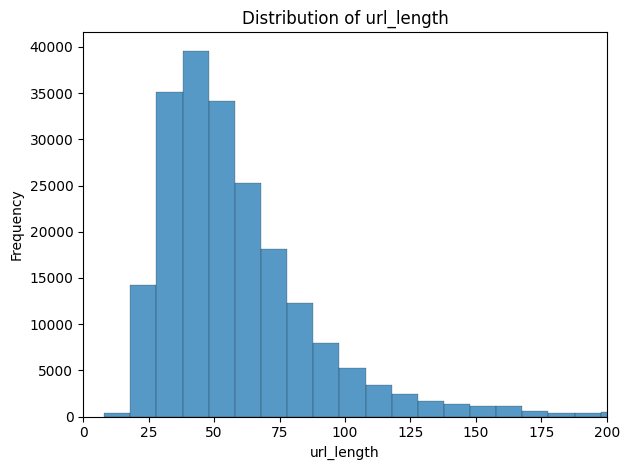

In [ ]:
# url_length
plt.figure()
sns.histplot(data=df, x="url_length", binwidth=10)
plt.title("Distribution of url_length")
plt.xlim(0, 200)  # 범위 제한
plt.xlabel("url_length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# num_dots

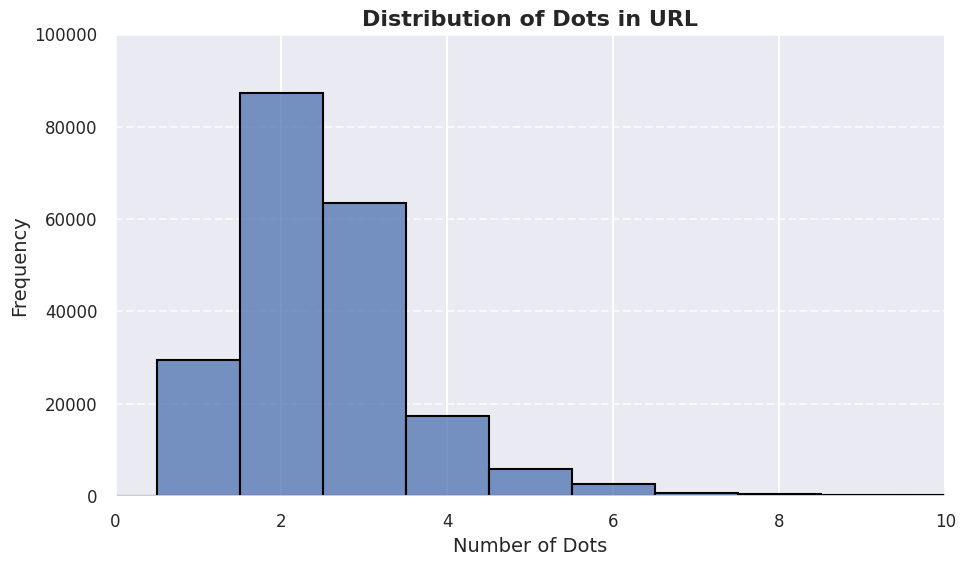

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn 스타일 지정 (darkgrid는 깔끔한 배경)
sns.set(style="darkgrid", context="talk", font_scale=1.0)

# 팔레트 및 색상 지정
color = sns.color_palette("coolwarm", as_cmap=True)

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x="num_dots",
    bins=11,
    discrete=True,
    color="#4C72B0",  # 고급스러운 블루 계열 색상
    edgecolor='black'
)

# 제목 및 라벨
plt.title("Distribution of Dots in URL", fontsize=16, weight='bold')
plt.xlabel("Number of Dots", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# 축 눈금 스타일 설정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 축 범위 조정 (필요시)
plt.xlim(0, 10)
plt.ylim(0, 100000)

# 격자 추가 (선택 사항)
plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# 레이아웃 정리 및 출력
plt.tight_layout()
plt.show()


# num_hyphens

/tmp/ipython-input-11-1816137056.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_hyphen_counts.index, y=top_hyphen_counts.values, palette=colors)


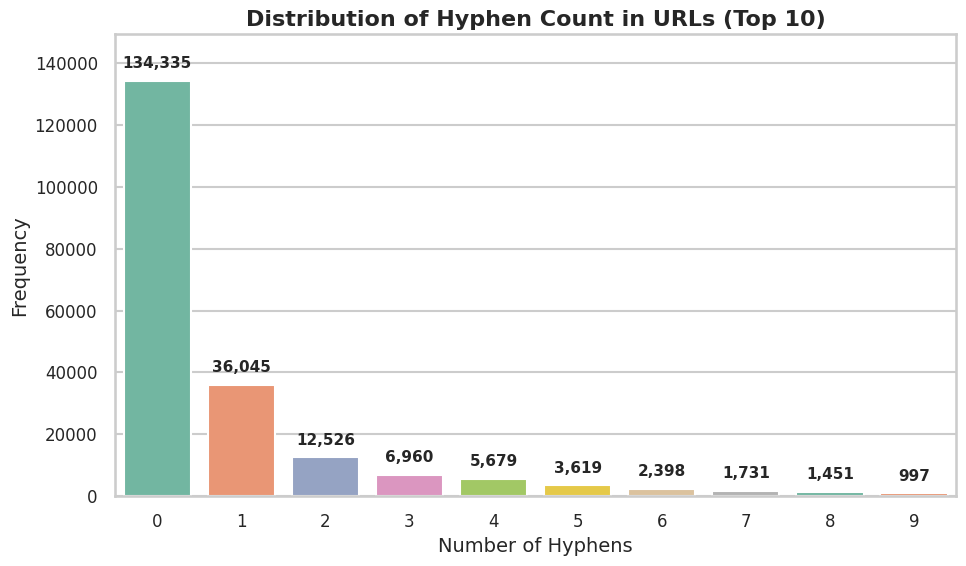

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
top_n = 10
hyphen_counts = df["num_hyphens"].value_counts().sort_index()
top_hyphen_counts = hyphen_counts[:top_n]

# 시각화 스타일 설정
sns.set(style="whitegrid", context="talk", font_scale=1.0)

# 시각화
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Set2", n_colors=top_n)  # 더 다채로운 색감
ax = sns.barplot(x=top_hyphen_counts.index, y=top_hyphen_counts.values, palette=colors)

# 막대 위에 값 표시
for i, value in enumerate(top_hyphen_counts.values):
    ax.text(i, value + 3000, f"{value:,}", ha='center', va='bottom', fontsize=11, fontweight='bold')

# 제목 및 라벨 설정
plt.title("Distribution of Hyphen Count in URLs (Top 10)", fontsize=16, weight='bold')
plt.xlabel("Number of Hyphens", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# 눈금 폰트 크기
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# y축 범위 여유 있게 설정
plt.ylim(0, top_hyphen_counts.max() + 15000)

# 레이아웃 정리 및 출력
plt.tight_layout()
plt.show()

# has_https

/tmp/ipython-input-38-4172019588.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="has_https", palette=colors)


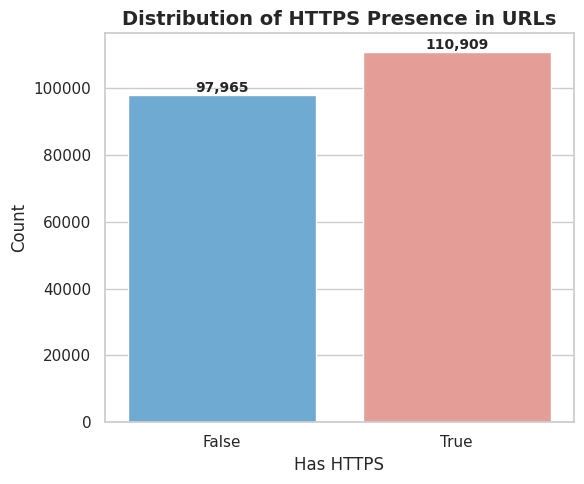

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set(style="whitegrid")
plt.figure(figsize=(6, 5))

# 컬러 지정
colors = ['#5DADE2', '#F1948A']  # True, False에 대한 색

# countplot
ax = sns.countplot(data=df, x="has_https", palette=colors)

# 타이틀, 라벨
plt.title("Distribution of HTTPS Presence in URLs", fontsize=14, weight='bold')
plt.xlabel("Has HTTPS", fontsize=12)
plt.ylabel("Count", fontsize=12)

# 데이터 라벨 표시
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count:,}',                # 천 단위 쉼표
                (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom',
                fontsize=10, fontweight='semibold')

plt.tight_layout()
plt.show()

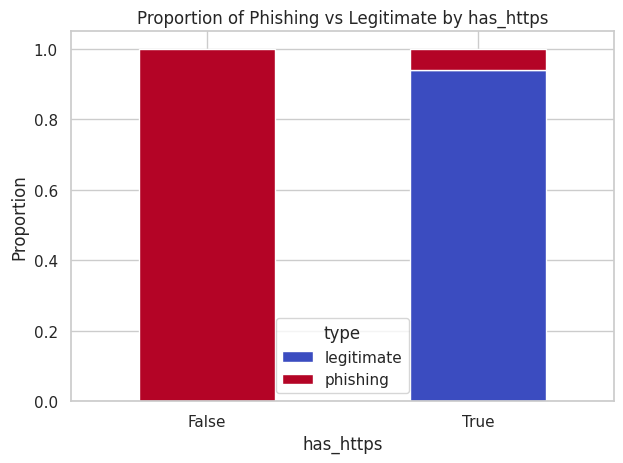

In [ ]:
cross_tab = pd.crosstab(df['has_https'], df['type'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Proportion of Phishing vs Legitimate by has_https')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
https_phishing = df[(df['has_https'] == True) & (df['type'] == 'phishing')]
https_legit = df[(df['has_https'] == True) & (df['type'] == 'legitimate')]

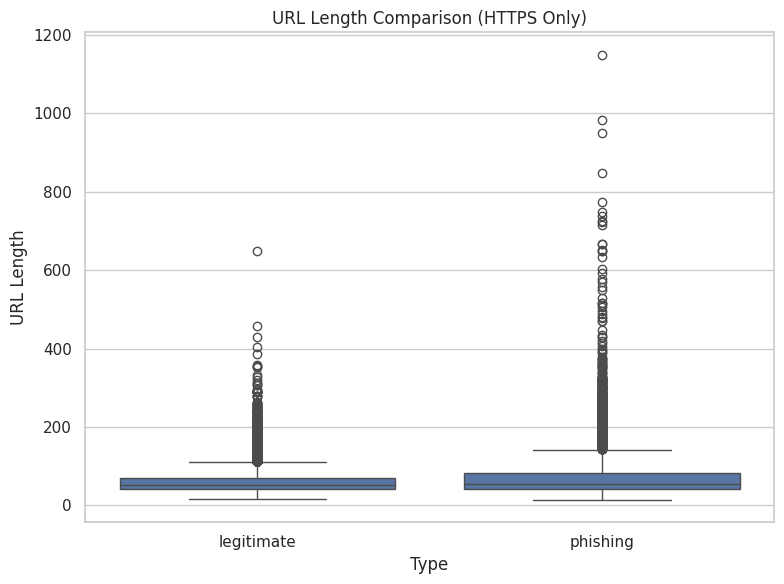

In [ ]:
# 박스플롯 시각화
plt.figure(figsize=(8,6))
sns.boxplot(data=df[df['has_https'] == True], x='type', y='url_length')
plt.title('URL Length Comparison (HTTPS Only)')
plt.xlabel('Type')
plt.ylabel('URL Length')
plt.tight_layout()
plt.show()

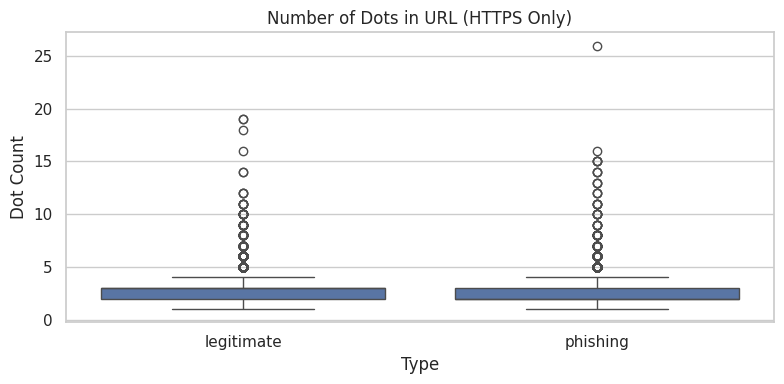

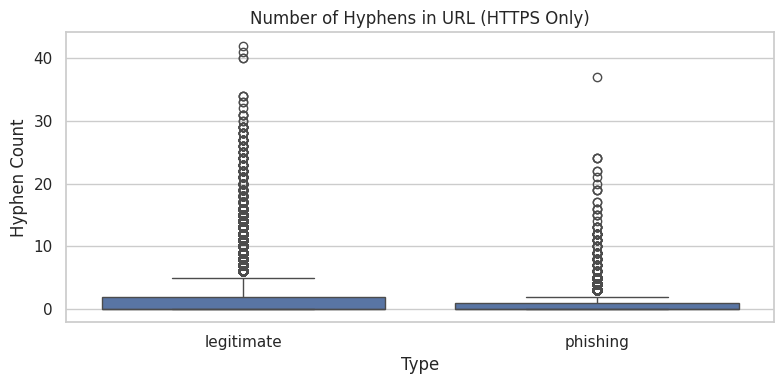

In [ ]:
# 점(dot) 개수 비교
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[df['has_https'] == True], x='type', y='num_dots')
plt.title('Number of Dots in URL (HTTPS Only)')
plt.xlabel('Type')
plt.ylabel('Dot Count')
plt.tight_layout()
plt.show()

# 하이픈(hyphen) 개수 비교
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[df['has_https'] == True], x='type', y='num_hyphens')
plt.title('Number of Hyphens in URL (HTTPS Only)')
plt.xlabel('Type')
plt.ylabel('Hyphen Count')
plt.tight_layout()
plt.show()

In [ ]:
# 얼마나 의심스러운 단어를 포함하고 있나?
suspicious_ratio = https_phishing['has_suspicious_word'].mean()
print(f"has_suspicious_word 비율: {suspicious_ratio:.2f}")

has_suspicious_word 비율: 0.23


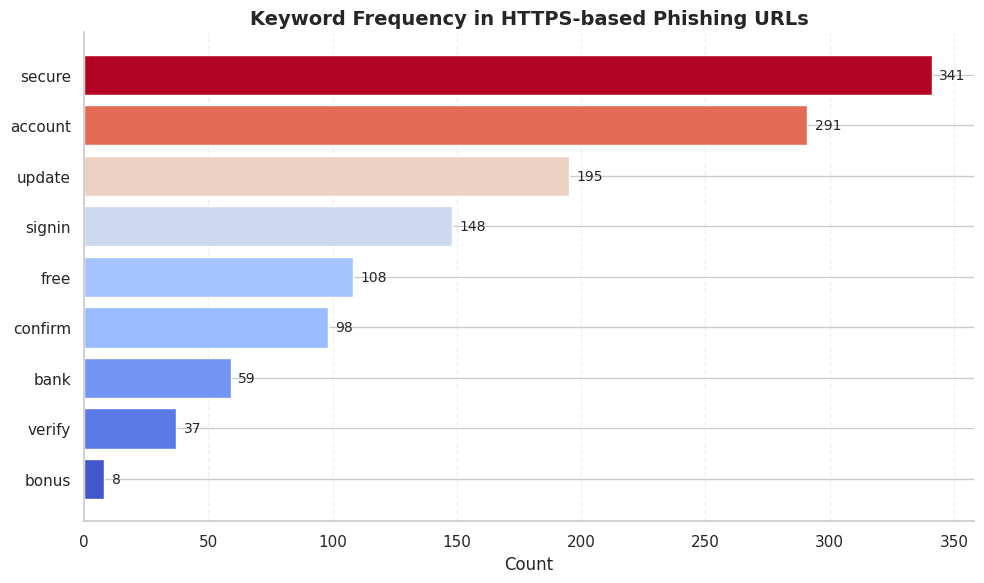

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 데이터 준비
keywords = ['secure', 'account', 'update', 'free', 'bonus', 'verify', 'signin', 'bank', 'confirm']
counts = {}

for word in keywords:
    count = https_phishing['url'].str.contains(word, case=False, na=False).sum()
    counts[word] = count

keyword_series = pd.Series(counts).sort_values()

# 컬러맵 적용 (예: coolwarm)
norm = keyword_series / keyword_series.max()
colors = plt.cm.coolwarm(norm)

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(keyword_series.index, keyword_series.values, color=colors)

# 값 표시
for bar in bars:
    width = bar.get_width()
    plt.text(width + 3, bar.get_y() + bar.get_height()/2,
             f"{int(width)}", va='center', fontsize=10)

# 꾸미기
plt.title('Keyword Frequency in HTTPS-based Phishing URLs', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


# has_suspicious_word

/tmp/ipython-input-31-732167747.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipython-input-31-732167747.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Suspicious Word', 'Has Suspicious Word'], fontsize=12)


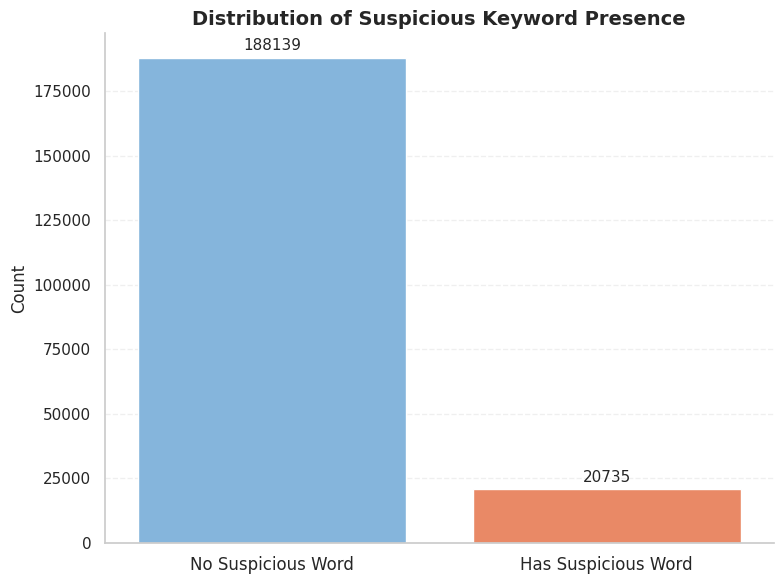

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=df,
    x="has_suspicious_word",
    palette=["#77B6EA", "#FF7F50"]  # 0은 파란색, 1은 주황색
)

# 레이블 붙이기
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=11, padding=3)

# 축 설정
ax.set_xticklabels(['No Suspicious Word', 'Has Suspicious Word'], fontsize=12)
ax.set_title("Distribution of Suspicious Keyword Presence", fontsize=14, fontweight='bold')
ax.set_xlabel("")
ax.set_ylabel("Count", fontsize=12)
sns.despine()  # 위, 오른쪽 테두리 제거
plt.grid(axis='y', linestyle='--', alpha=0.3)  # y축 눈금선 추가

plt.tight_layout()
plt.show()


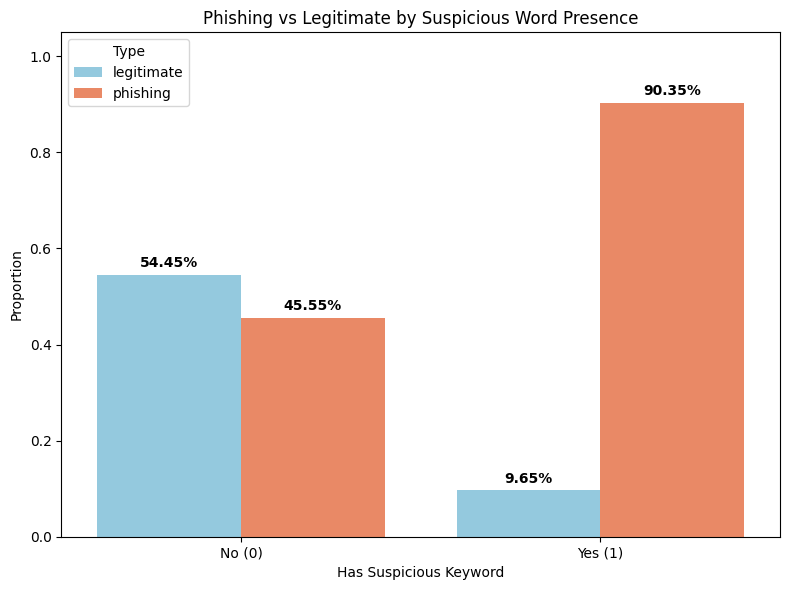

In [ ]:
# 데이터 준비
subset0 = df[df['has_suspicious_word'] == 0]['type'].value_counts(normalize=True).rename_axis('type').reset_index(name='proportion')
subset0['has_suspicious_word'] = 'No (0)'

subset1 = df[df['has_suspicious_word'] == 1]['type'].value_counts(normalize=True).rename_axis('type').reset_index(name='proportion')
subset1['has_suspicious_word'] = 'Yes (1)'

combined = pd.concat([subset0, subset1])

# 시각화
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=combined, x='has_suspicious_word', y='proportion', hue='type', palette=['skyblue', 'coral'])

# 퍼센트 라벨 추가 (0.00% 제외)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{height*100:.2f}%',
            (p.get_x() + p.get_width() / 2., height + 0.01),
            ha='center', va='bottom',
            fontsize=10, weight='bold'
        )

plt.ylim(0, 1.05)
plt.title('Phishing vs Legitimate by Suspicious Word Presence')
plt.xlabel('Has Suspicious Keyword')
plt.ylabel('Proportion')
plt.legend(title='Type', loc='upper left')  # 범례 왼쪽 위로 이동
plt.tight_layout()
plt.show()

/tmp/ipython-input-34-4190895201.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_series.values, y=keyword_series.index, palette="flare")


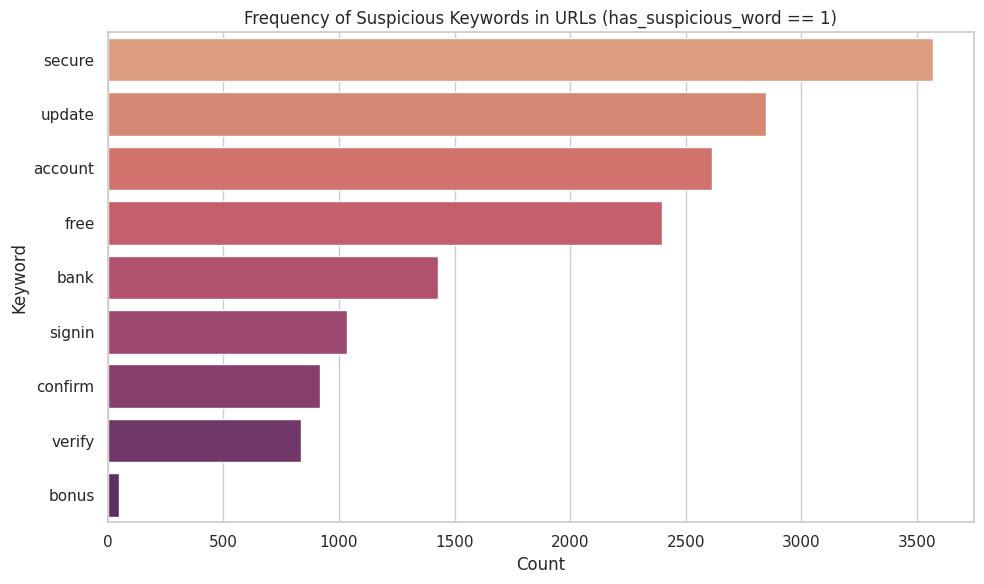

In [ ]:
# 3. 의심 단어 리스트 정의
suspicious_keywords = [
    'secure', 'account', 'update', 'free',
    'bonus', 'verify', 'signin', 'bank', 'confirm'
]

# 4. has_suspicious_word == 1인 URL 필터링
suspicious_df = df[df["has_suspicious_word"] == 1]

# 5. 각 단어가 얼마나 등장하는지 세기
keyword_counts = {}
for word in suspicious_keywords:
    keyword_counts[word] = suspicious_df["url"].str.contains(word, case=False).sum()

# 6. 시리즈로 변환해서 barplot 그리기
keyword_series = pd.Series(keyword_counts).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=keyword_series.values, y=keyword_series.index, palette="flare")
plt.title("Frequency of Suspicious Keywords in URLs (has_suspicious_word == 1)")
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Filter rows without suspicious keywords
no_keyword_df = df[df['has_suspicious_word'] == 0]

# List of numeric features to test
features = ['url_length', 'num_dots', 'num_hyphens']

# Perform t-test between phishing and legitimate URLs for each feature
for feature in features:
    legit = no_keyword_df[no_keyword_df['type'] == 'legitimate'][feature]
    phish = no_keyword_df[no_keyword_df['type'] == 'phishing'][feature]
    stat, p = ttest_ind(legit, phish, equal_var=False)
    print(f"{feature} | t-stat: {stat:.3f}, p-value: {p:}")

print("----------------------------------------------")

# Filter rows with suspicious keywords
no_keyword_df = df[df['has_suspicious_word'] == 1]

# List of numeric features to test
features = ['url_length', 'num_dots', 'num_hyphens']

# Perform t-test between phishing and legitimate URLs for each feature
for feature in features:
    legit = no_keyword_df[no_keyword_df['type'] == 'legitimate'][feature]
    phish = no_keyword_df[no_keyword_df['type'] == 'phishing'][feature]
    stat, p = ttest_ind(legit, phish, equal_var=False)
    print(f"{feature} | t-stat: {stat:.3f}, p-value: {p:}")

url_length | t-stat: -5.048, p-value: 4.4770960212995017e-07
num_dots | t-stat: 45.913, p-value: 0.0
num_hyphens | t-stat: 101.499, p-value: 0.0
----------------------------------------------
url_length | t-stat: -30.977, p-value: 3.717046122671562e-192
num_dots | t-stat: -6.713, p-value: 2.2134167812171295e-11
num_hyphens | t-stat: 11.788, p-value: 4.317033396114863e-31


In [ ]:
from scipy.stats import ttest_ind

# 전체 데이터 기준으로
features = ['url_length', 'num_dots', 'num_hyphens']

for feature in features:
    legit = df[df['type'] == 'legitimate'][feature]
    phish = df[df['type'] == 'phishing'][feature]
    stat, p = ttest_ind(legit, phish, equal_var=False)
    print(f"{feature} | t-stat: {stat:.10f}, p-value: {p:}")

url_length | t-stat: -36.1889260801, p-value: 1.9935816131116476e-285
num_dots | t-stat: 21.5189465051, p-value: 1.5316475506782854e-102
num_hyphens | t-stat: 94.0875678019, p-value: 0.0


In [ ]:
# 가독성 떨어지게 하기 위해서 url을 길게 헀었음 예전에는, 지금은 보안이슈로 오히려 길게 짠다는 추세 (URL 길이 관련)

In [ ]:
print(df.columns.tolist())

['url', 'type', 'url_length', 'num_dots', 'num_hyphens', 'has_https', 'has_suspicious_word']


# 로지스틱 회귀

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [ ]:
# 1. 데이터 불러오기
df = pd.read_csv('URL_dataset_processed(new).csv')
df['type_binary'] = df['type'].map({'legitimate': 0, 'phishing': 1})

In [ ]:
# 2. Feature & Target 설정
features = ['url_length', 'num_dots', 'num_hyphens']
X = df[features]
y = df['type_binary']

# 3. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. 확률 예측
y_probs = model.predict_proba(X_test)[:, 1]

# 6. ✅ 최적 Cut-off로 재분류 (0.53 기준)
optimal_threshold = 0.53
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

# 7. 평가
print("🔍 Classification Report (Threshold = 0.53):")
print(classification_report(y_test, y_pred_optimal, target_names=["Legitimate", "Phishing"]))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)
print("🧩 Confusion Matrix:")
print(cm)

# 9. 정밀도/재현율/F1/정확도 수치 출력
acc = accuracy_score(y_test, y_pred_optimal)
prec = precision_score(y_test, y_pred_optimal)
rec = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)

print(f"\n✅ Accuracy:  {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")

🔍 Classification Report (Threshold = 0.53):
              precision    recall  f1-score   support

  Legitimate       0.62      0.72      0.67     31364
    Phishing       0.67      0.56      0.61     31299

    accuracy                           0.64     62663
   macro avg       0.64      0.64      0.64     62663
weighted avg       0.64      0.64      0.64     62663

🧩 Confusion Matrix:
[[22474  8890]
 [13646 17653]]

✅ Accuracy:  0.6404
✅ Precision: 0.6651
✅ Recall:    0.5640
✅ F1 Score:  0.6104


🔍 AUC Score: 0.6866
✅ Optimal Cut-off Threshold (Youden's J): 0.5253


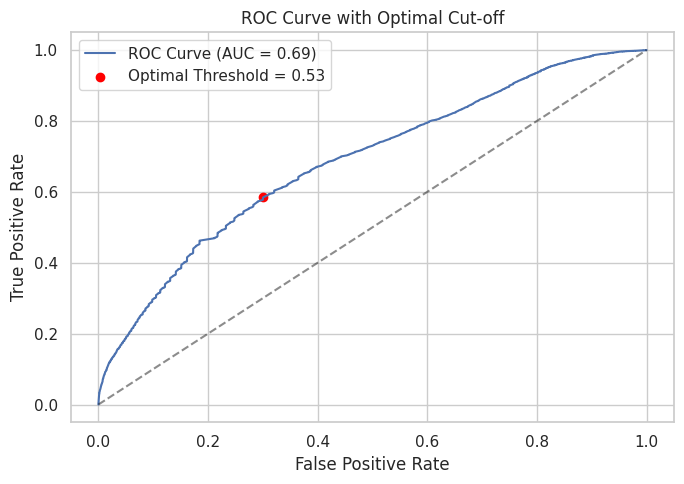

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# 1. 데이터 불러오기
df = pd.read_csv('URL_dataset_processed(new).csv')
df['type_binary'] = df['type'].map({'legitimate': 0, 'phishing': 1})

# 2. Feature & Target 설정
features = ['url_length', 'num_dots', 'num_hyphens']
X = df[features]
y = df['type_binary']

# 3. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. 확률 예측
y_probs = model.predict_proba(X_test)[:, 1]

# 6. ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# 7. Youden's J statistic으로 최적 cut-off 찾기
j_scores = tpr - fpr
j_max_index = np.argmax(j_scores)
optimal_threshold = thresholds[j_max_index]

# 8. AUC
auc_score = roc_auc_score(y_test, y_probs)

# 9. 결과 출력
print(f"🔍 AUC Score: {auc_score:.4f}")
print(f"✅ Optimal Cut-off Threshold (Youden's J): {optimal_threshold:.4f}")

# 10. 시각화
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.scatter(fpr[j_max_index], tpr[j_max_index], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.plot([0,1], [0,1], 'k--', alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Optimal Cut-off")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()